In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
sigma = 20
n_samples = 2000
n_features = 3
batch_size = 32
alpha = 2.1
beta1 = -3.32
beta2 = 0.3
beta3 = -1.4

In [7]:
X = np.random.rand(n_samples, n_features).astype(float)
y = alpha + beta1*X[:, 0] + beta2*X[:, 1] + beta3*X[:, 2] + np.random.normal(loc=0, scale=sigma)

indices = np.arange(n_samples)
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

train_split, val_split, test_split = 0.7, 0.2, 0.1

X_train = X[:int(train_split*n_samples)]
X_val = X[int(train_split*n_samples):(int(train_split*n_samples) + int(val_split*n_samples))]
X_test = X[-int(test_split*n_samples):]

y_train = y[:int(train_split*n_samples)]
y_val = y[int(train_split*n_samples):(int(train_split*n_samples) + int(val_split*n_samples))]
y_test = y[-int(test_split*n_samples):]

print(f'train shape = X: {X_train.shape}, y: {y_train.shape}')
print(f'val shape = X: {X_val.shape}, y: {y_val.shape}')
print(f'test shape = X: {X_test.shape}, y: {y_test.shape}')

train shape = X: (1400, 3), y: (1400,)
val shape = X: (400, 3), y: (400,)
test shape = X: (200, 3), y: (200,)


In [8]:
dataset_train = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
dataset_val = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size)
dataset_test = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

X_dummy, y_dummy = next(iter(dataset_val))
print(f'input data shape = X: {X_dummy.shape}, y: {y_dummy.shape}')

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=5, activation='relu'),
    tf.keras.layers.Dense(1)
])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    mode='min'
)

model.compile(optimizer='adam',loss='mse')

model(X_dummy) # build model

print(f'\nEstimating {model.count_params():,} parameters on {n_samples:,} datapoints ...\n')

input data shape = X: (32, 3), y: (32,)

Estimating 26 parameters on 2,000 datapoints ...



In [9]:
history = model.fit(dataset_train, validation_data=dataset_val, epochs=100, verbose=0, callbacks=[early_stopping])

y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


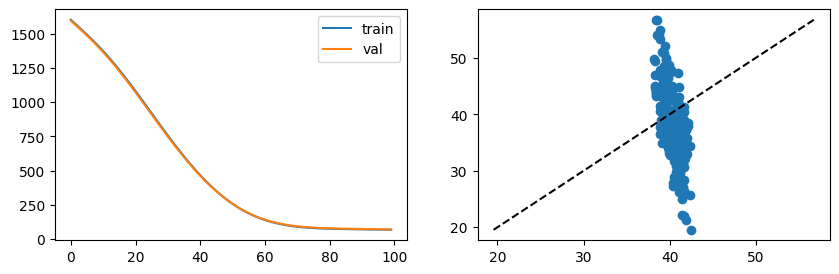

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].plot(history.history['loss'], label='train')
ax[0].plot(history.history['val_loss'], label='val')
ax[0].legend()
ax[1].scatter(y_test, y_pred)
ax[1].plot([min(y_pred.min(), y_test.min()), max(y_pred.max(), y_test.max())], [min(y_pred.min(), y_test.min()), max(y_pred.max(), y_test.max())], 'k--')
plt.show()